# HT3 Modelos de regresion lineal

Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869

Del conjunto de archivos proporcionados son: 

- data_description.txt: descripcion de cada columna proporcinado por el conjunto de datos a trabajar

- train.csv: el conjunto de training

- test.csv: el conjunto de test
 
- sample_submission.csv: presentacion de un punto de referencia a partir de una regresion lineal sobre el año y mes de venta.


Pero el único archivo que se usará es: train.csv.

# Análisis exploratorio

In [477]:
#librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [478]:
#cargar los datos
df_train = pd.read_csv("train.csv")


In [479]:
#exploracion de datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df_train.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
df_train.describe()



--Columnas:---
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [480]:
df_train.describe(include="O")  # Estadísticas de las variables categóricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [481]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df_train.dtypes)

tipos_de_datos = df_train.dtypes.value_counts()

print('resumen:')
print(tipos_de_datos)




----Tipo de datos:---
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
resumen:
object     43
int64      35
float64     3
Name: count, dtype: int64


## Variables

esta descripcion es tomada de https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale
- id: id de sale

Tipo de variables:
Variables cualitativas:

Ordinales:
- OverallQual
- OverallCond
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence


Norminales:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- PavedDrive
- MiscFeature
- SaleType
- SaleCondition

Variables cuantitativas:

Continuas:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- SalePrice

discretras:
- MSSubClass
- YearBuilt
- YearRemodAdd
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageYrBlt
- MoSold
- YrSold

In [482]:
# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df_train.isnull()
print(nulos)

nulos_por_columna = df_train.isnull().sum()
print(list(nulos_por_columna))

# df_train = df_train.dropna()
# print(df_train.shape)


- - - - - - - VALORES NULLS - - - - - - -
         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence 

Analisis de la variable que se quiere predecir (SalePrice):

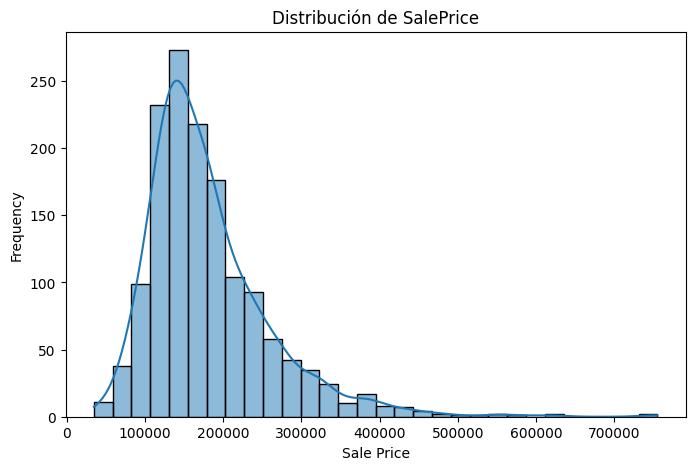

In [483]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df_train["SalePrice"], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribución de SalePrice")
plt.show()

Lo que se puede ver en la distribución de SalesPrice es que esta sesgada a la derecha.

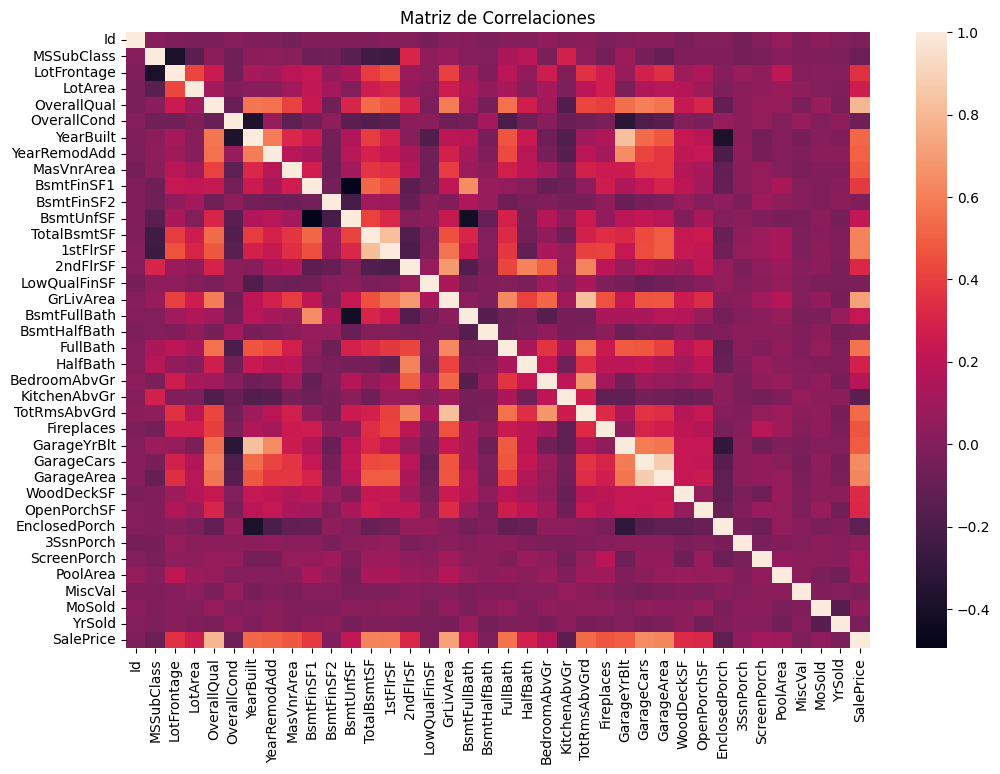

In [484]:
correlation_matrix = df_train.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

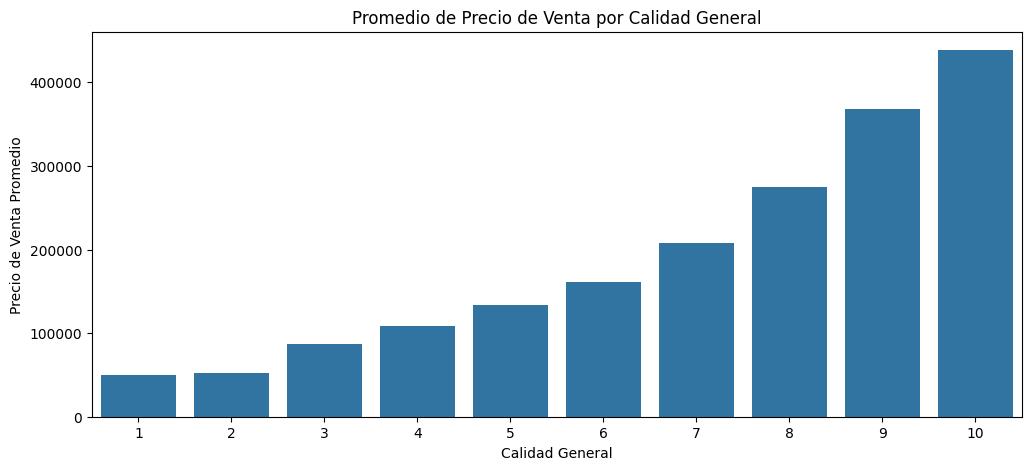

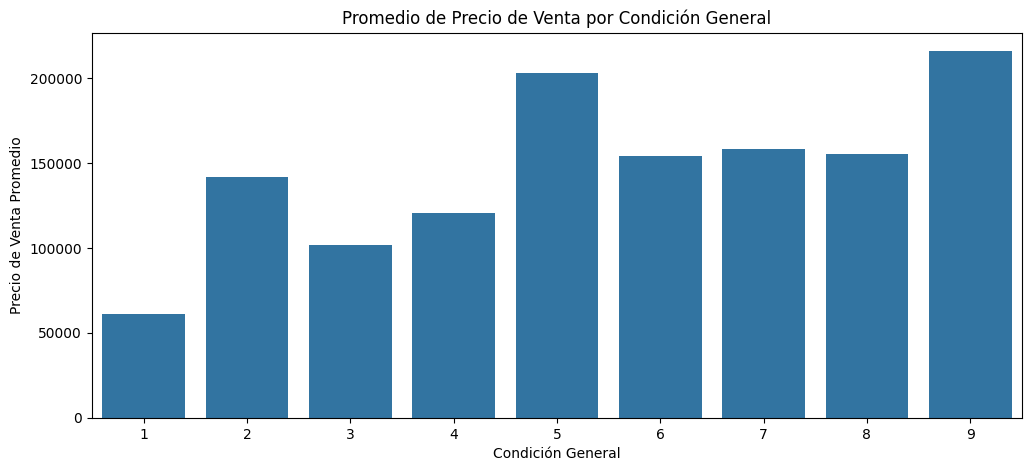

(OverallQual
 1      50150.000000
 2      51770.333333
 3      87473.750000
 4     108420.655172
 5     133523.347607
 6     161603.034759
 7     207716.423197
 8     274735.535714
 9     367513.023256
 10    438588.388889
 Name: SalePrice, dtype: float64,
 OverallCond
 1     61000.000000
 2    141986.400000
 3    101929.400000
 4    120438.438596
 5    203146.914738
 6    153961.591270
 7    158145.487805
 8    155651.736111
 9    216004.545455
 Name: SalePrice, dtype: float64)

In [485]:
quality_groups = df_train.groupby('OverallQual')['SalePrice'].mean()

condition_groups = df_train.groupby('OverallCond')['SalePrice'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=condition_groups.index, y=condition_groups.values)
plt.title("Promedio de Precio de Venta por Condición General")
plt.xlabel("Condición General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

quality_groups, condition_groups

# Hallazgos de los conjuntos de datos

La variable objetico que es la de SalesPrice, esta sesgada a la derecha, por lo cual es recomendable normalizar los datos para evitar sesgos en el modelo. Ya que, las variables tienen diferentes escalas y unidades.

# Dividir el set de datos a usar
# clustering

### Variables con las que se calcularan los grupos para proyectar el precio de las viviendas de manera precisa. 

Se han considerado las siguientes variables: 
- OverallQual: Calidad general de la vivienda.
- GrLivArea: area habitable por encima del nivel del suelo en pies cuadrados
- Neighborhood: Ubicación física dentro de los límites de la ciudad
- TotalBsmtSF: area total del sotano en pies cuadrados
- 1stFlrSF: area del primer piso
- GarageCars: capacidad del garage en numero de carros
- GarageArea: area del garage en pies cuadrados
- YearBuilt: año en que se construyó la vivienda
- YearRemod: año en que se remodeló la vivienda
- FullBath: numero de baños completos
- LotFrontage: longitud de la propiedad en pies
- LotArea: area de la propiedad en pies cuadrados
- SalePrice: valor de la propiedad (esta es la que se trata de predecir)


In [486]:
#nuevo data frame con solo la informacion que se va a utilizar
df = df_train[['SalePrice','OverallQual', 'GrLivArea', 'Neighborhood', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']].copy()

#### tendencia de agrupamiento

In [487]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
numeric_columns = ['SalePrice','OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
categorical_columns = ['Neighborhood']

numeric_df = df[numeric_columns]
categoric_df = df[categorical_columns]
combined_df = pd.concat([numeric_df, categoric_df], axis=1)

print(combined_df.shape)
print(combined_df.isnull().sum())

clean_df = combined_df.dropna()
print(clean_df.shape)

num_df = clean_df[numeric_columns]
cat_df = clean_df[categorical_columns]

#variables predictoras
X_values = ['OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
X = num_df[X_values]

#variable objetivo
y= num_df['SalePrice']

assert not np.any(np.isnan(X)), "X contiene NaN"
assert not np.any(np.isnan(y)), "y contiene NaN"


(1460, 13)
SalePrice         0
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
1stFlrSF          0
GarageCars        0
GarageArea        0
YearBuilt         0
YearRemodAdd      0
FullBath          0
LotFrontage     259
LotArea           0
Neighborhood      0
dtype: int64
(1201, 13)


In [488]:
import random
import sklearn.preprocessing
import pyclustertend
# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(X)
X_df =pd.DataFrame(X_scale)


# Crear muestras, esto se hace para tener una visualizacion mas clara y entender mejor la tendencia de agrupamiento
X_scale_sample = X_df.sample(100, random_state=123)
X_sample = X.sample(100, random_state=123)

# Convertir las muestras a arrays de numpy
X_scale_sample = X_scale_sample.to_numpy()
X_sample = X_sample.to_numpy()

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat}')

Estadística de Hopkins: 0.08435881059793536


En la estadística de Hopkins los valores que se encuentran cercanos a 0, indican que los datos estan muy agrupados, lo que sugiere que hay una estructura clara y que el clustering puede ser bastante efectivo. 

Aqui los resultados estan cercanos a 0, indican que los datos estan muy agrupados.

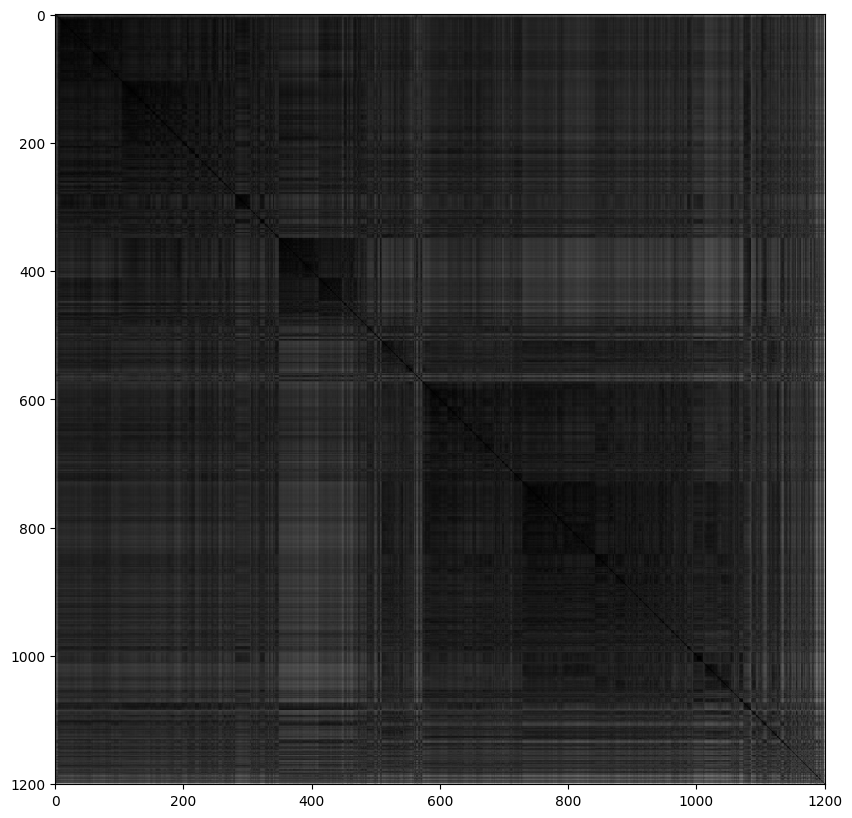

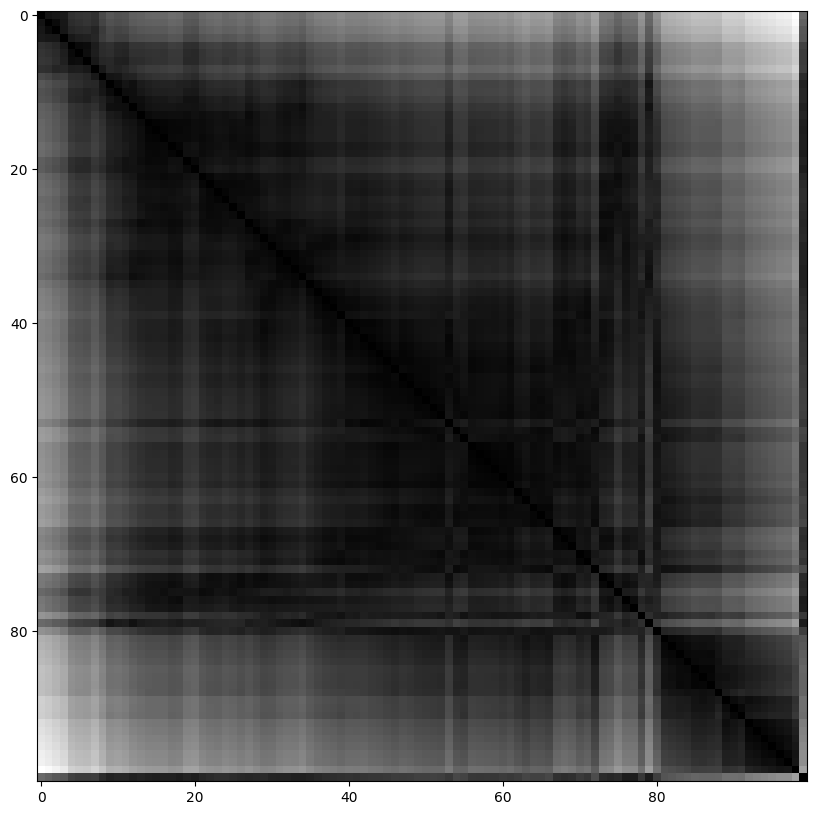

In [489]:
pyclustertend.vat(X_scale)

pyclustertend.vat(X_sample)

La gráfica VAT muestra una matriz de distancia, en donde los puntos representan la distancia entre los datos. La transición de negro a gris claro lo que nos indica es la intensidad de distancias. Siendo el negro distancias cortas y el gris claro distancias largas. Cuando hay áreas grandes de negro, lo que nos indica es que hay clusters muy cerca entre sí. Y se trabajó con una muestra de datos, ya que al usar todos los datos la visualización es bastante densa, por lo cual se decidió trabajar con una muestra de datos para poder visualizar mejor la gráfica.

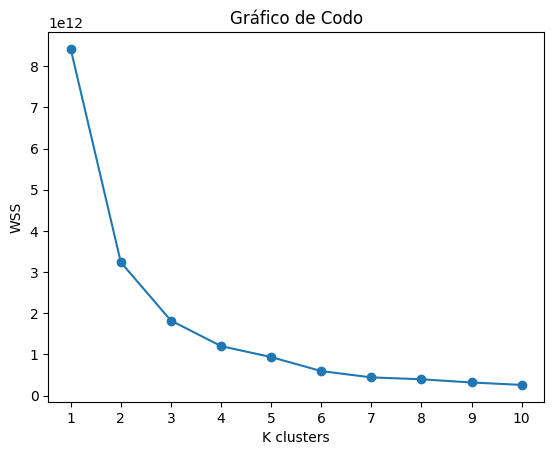

In [490]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#saber el numero de K clusters
numeroClusters = range(1,11)
wcss = []

for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(num_df)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("K clusters")
plt.ylabel("WSS")
plt.title("Gráfico de Codo")
plt.show()

Al analizar el grafico de codo, K=2 es un buen numero para los datos, ya que en la suma de wss disminuye rapidamente hasta 2 clusters y luego ya se vuelve mas gradual.

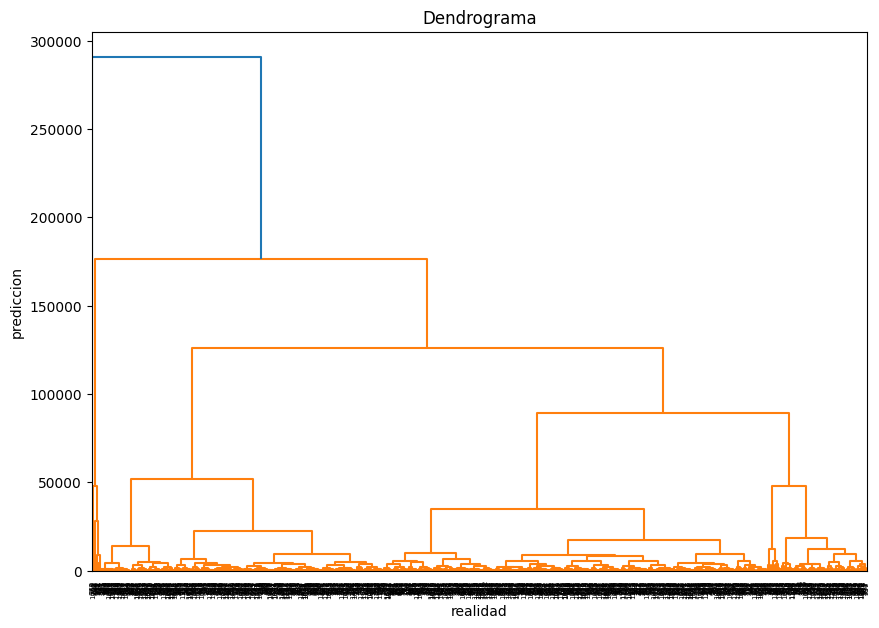

In [491]:
#clustering jerargico
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

# #calcular la matriz de distancias
dist = pdist(X, metric = 'euclidean')
#dendograma
plt.figure(figsize=(10, 7))
linkage = shc.linkage(X, method='ward')
dendro = shc.dendrogram(linkage)
plt.title("Dendrograma")
plt.xlabel("realidad")
plt.ylabel("prediccion")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.9753672650140027
For n_clusters = 3 The average silhouette_score is : 0.8723447671588405
For n_clusters = 4 The average silhouette_score is : 0.4533545679599374
For n_clusters = 5 The average silhouette_score is : 0.48333710352232157
For n_clusters = 6 The average silhouette_score is : 0.4828219940203071


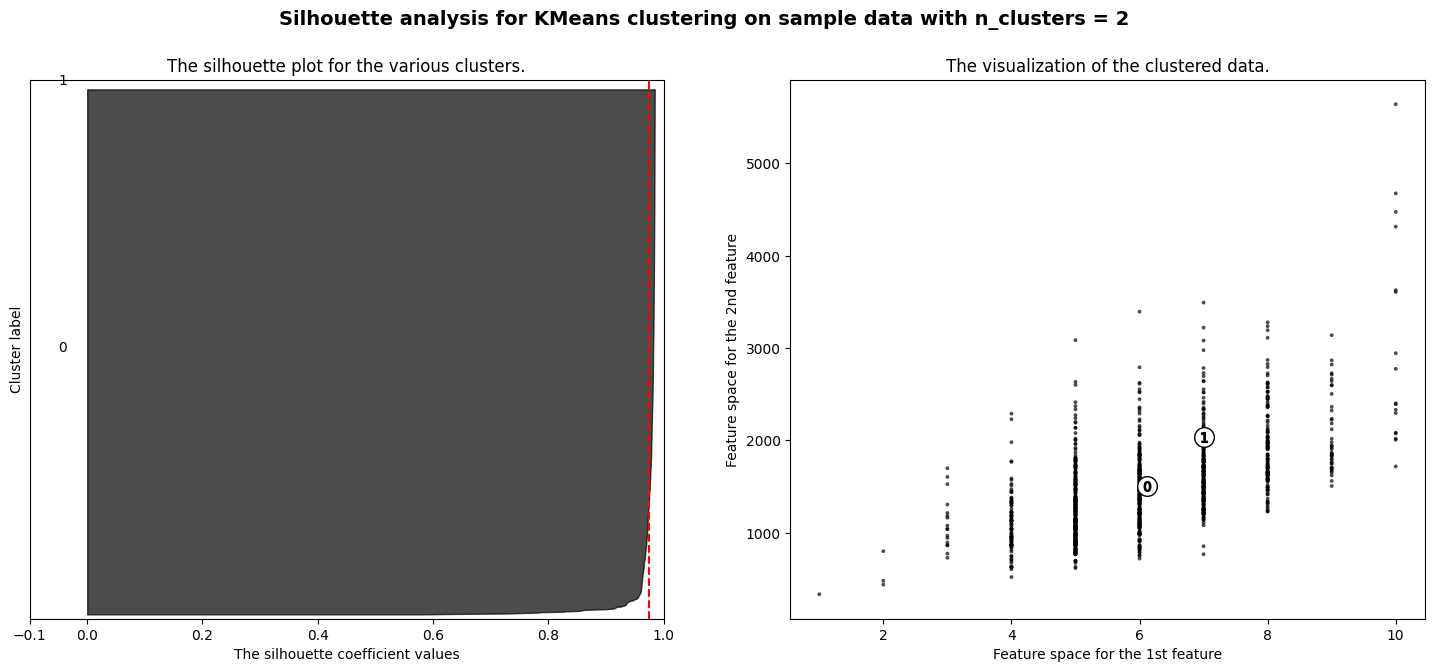

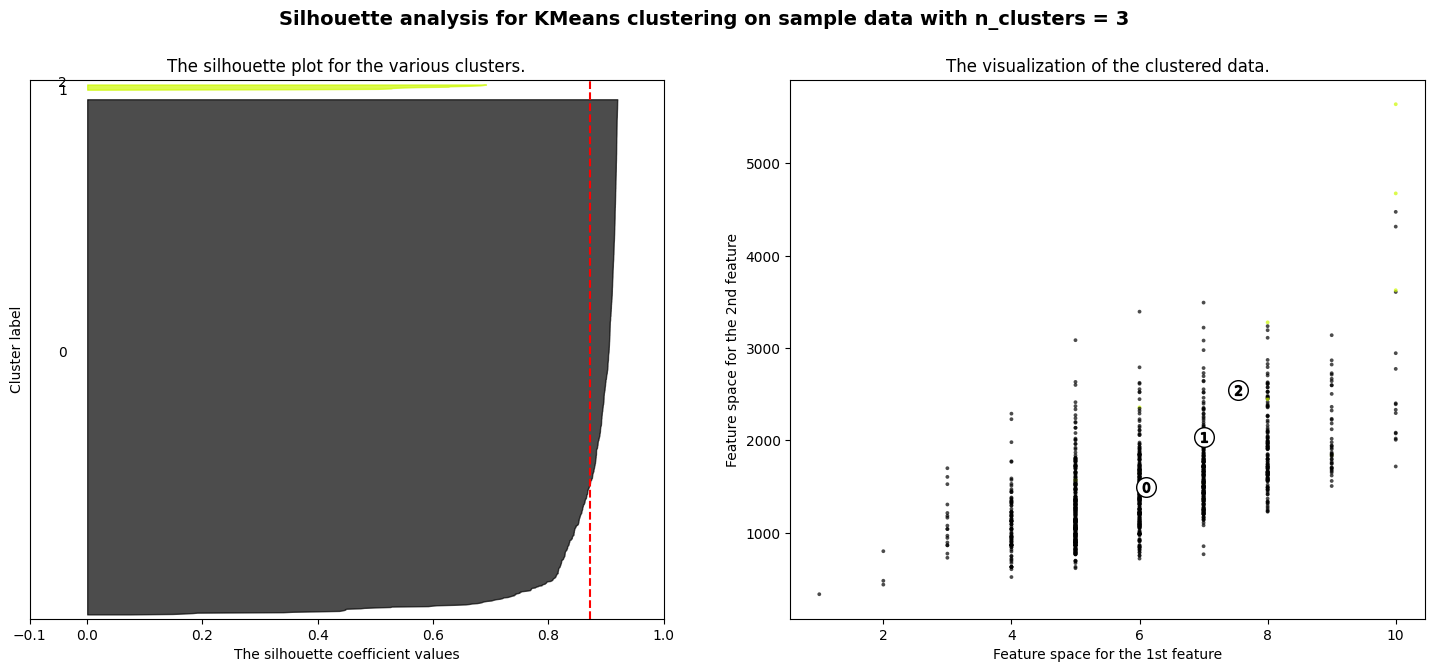

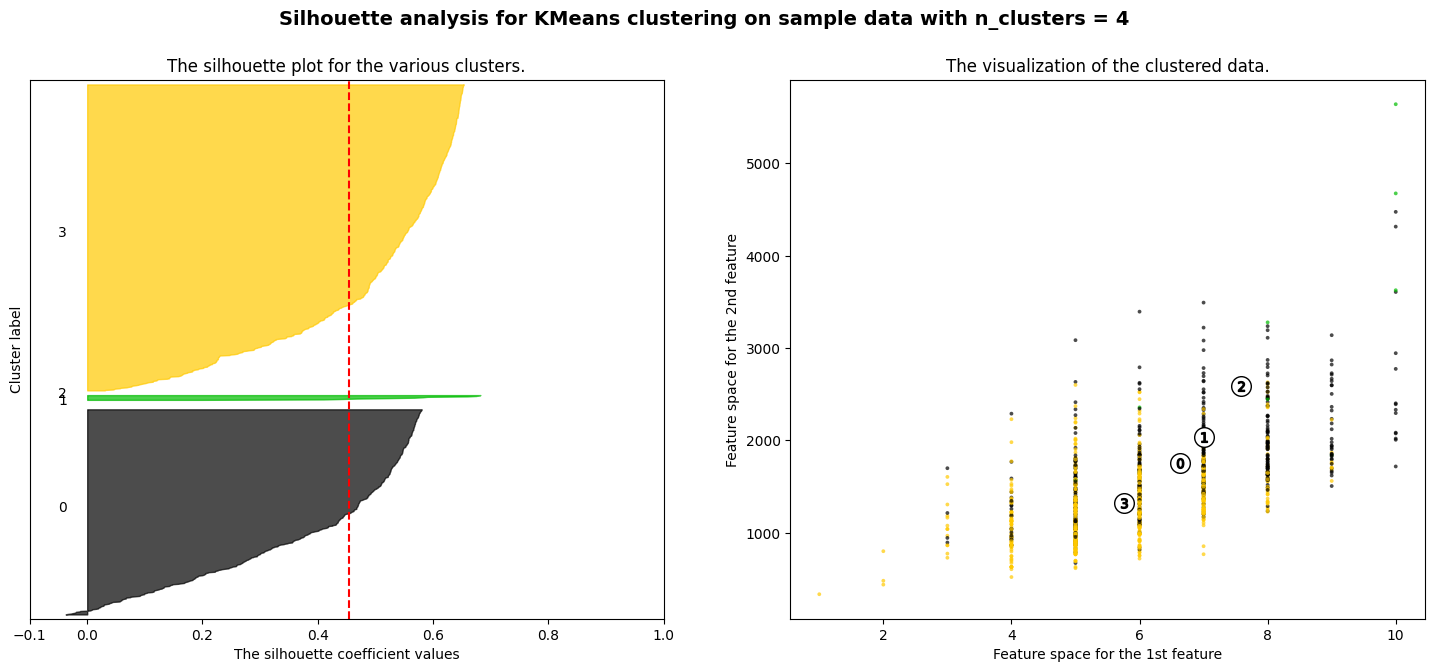

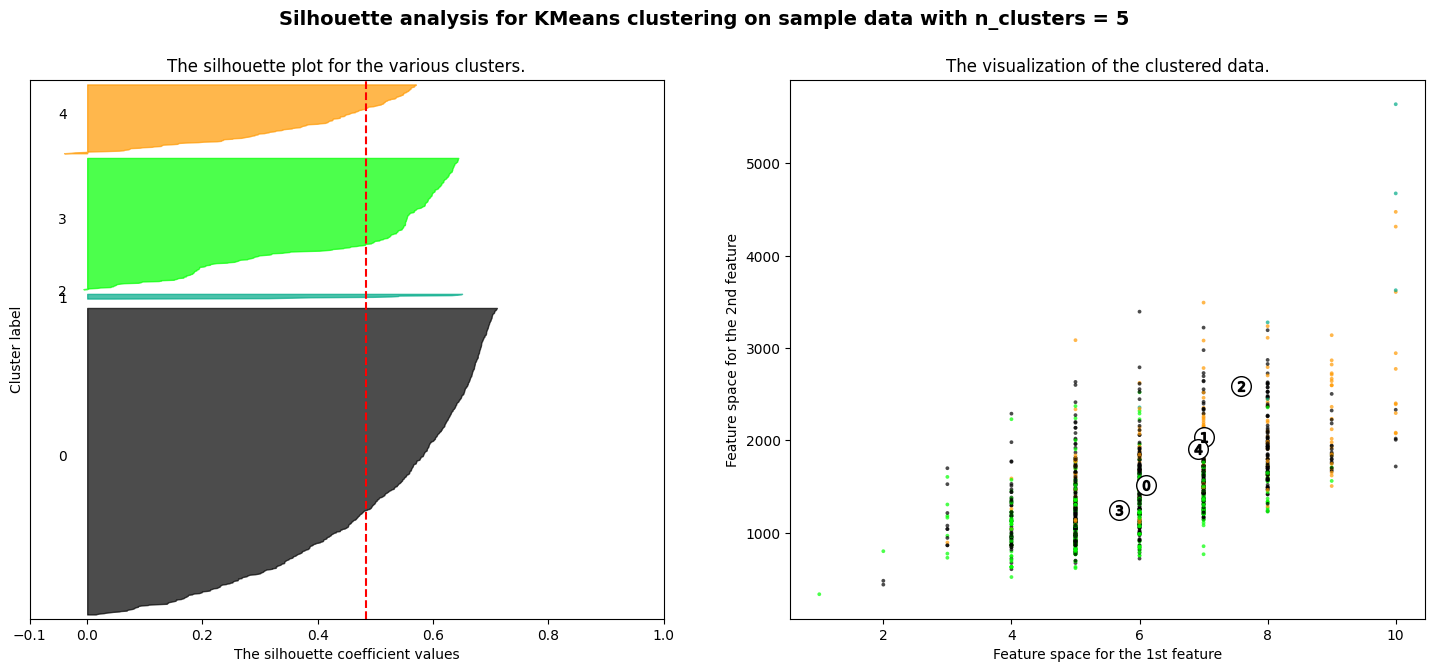

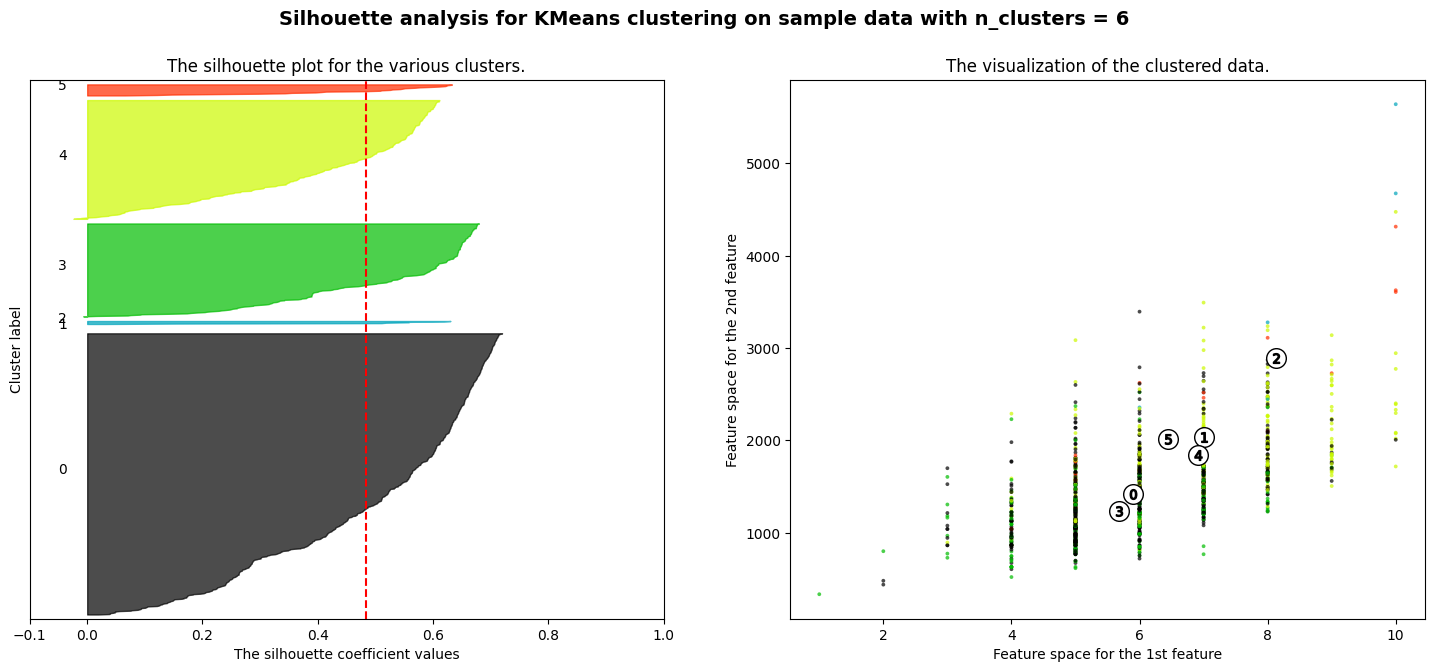

In [492]:
'''
este algoritmo fue tomado del archivo que dice Clustering.ipynb de la carpeta de ejemplos en modulos de la clase
'''


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# convertir x en un np.array
X_array = X.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_array[:, 0], X_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

El grafico de la silueta, lo que mide es que tan similar un punto a otros dentro del mismo cluster. Y este puede variar entre -1 a 1. Siendo un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus propios clusters y lejos de otros clusters.

Para este caso, en el gráfico, se ve que el número 2 de clusters es el que produce un resultado más equilibrado y el que tiene un valor de silueta más alto promedio. Por lo cual, concuerda con los resultados del dendograma.


----------
# Division de datos entrenamiento y prueba

### Uso de f_regression
Este es para el ver la importancia de las caracteristicas con el uso de regresion lineal, ya que este evalua la relacion entre cada caracteristica independiente y la variable objetivo usando pruebas de regresion lineal univariable.


las catacteristicas seleccionadas son:  Index(['OverallQual', 'GrLivArea'], dtype='object')


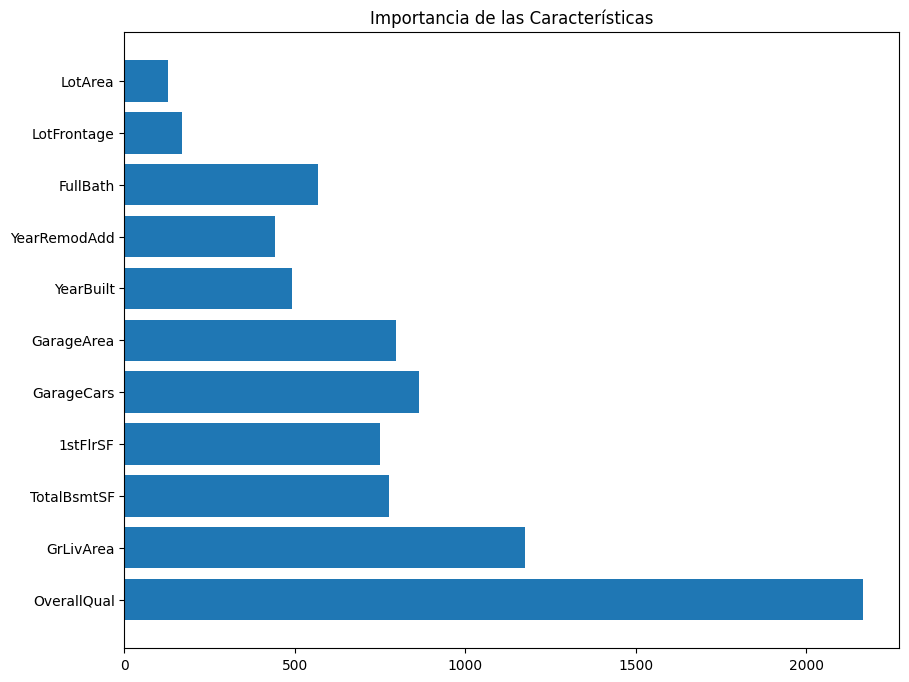

In [493]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, f_regression

selector= SelectKBest(f_regression, k=2) #seleccionar las mejores caracteristicas
selector.fit(X, y) #ajustar el selector de datos

features_Selected = selector.get_support(indices=True)
features_Selected_names = X.columns[features_Selected]
print("las catacteristicas seleccionadas son: ", features_Selected_names)

#grafico de la importancia de la categoria
plt.figure(figsize=(10, 8))
plt.barh(X.columns, selector.scores_)
plt.title("Importancia de las Características")
plt.show()

La variable que es un mejor predictor para SalePrice es OverQual segun los resultados obtenidos. Luego, estan las variables de GrLiveArea, GarageCars y GarageArea.

caracteristica seleccionada: OverallQual

In [494]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear el modelo de KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

bins = [0, 100000, 200000, 300000, 400000, 500000, np.inf]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']

y_binned = pd.cut(y, bins=bins, labels=labels)

# Divisiones
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binned, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Valor minimo: {X_train.min()}")
print(f"Valor maximo: {X_train.max()}")

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Valor minimo: -3.6162245630079712
Valor maximo: 11.460044331657844
Train shape: (960, 11), (960,)
Validation shape: (120, 11), (120,)
Test shape: (121, 11), (121,)


In [495]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.53
Valor: 0.000006 - Precisión en Validación: 0.53
Valor: 0.000036 - Precisión en Validación: 0.53
Valor: 0.000215 - Precisión en Validación: 0.53
Valor: 0.001292 - Precisión en Validación: 0.54
Valor: 0.007743 - Precisión en Validación: 0.62
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.75
Valor: 1.668101 - Precisión en Validación: 0.76
Valor: 10.000000 - Precisión en Validación: 0.74
Mejor Valor encontrado: 1.668101


Precisión en Test con C=1.668101: 0.79
Precisión en Test (Accuracy) con C=1.668101: 0.79
Precisión (Precision): 0.74
Recall (Sensibilidad): 0.77

Matriz de Confusión:


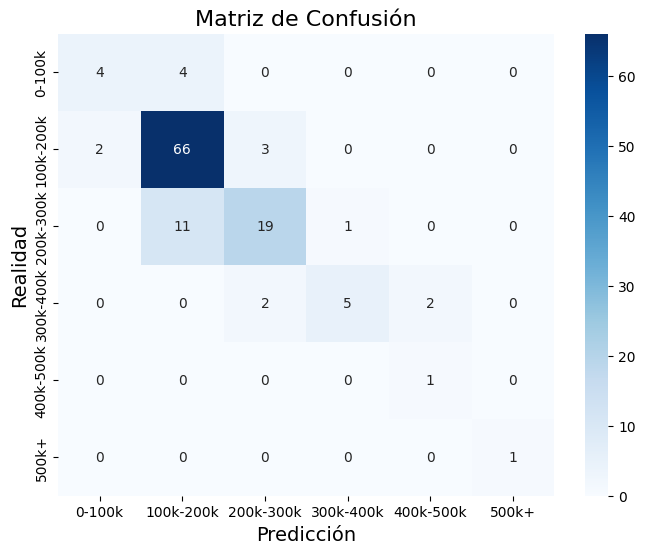

In [496]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Imprimir
print(f"Precisión en Test (Accuracy) con C={best_C:.6f}: {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
# print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()


# #distribución de etiquetas en y_test
# print(y_test.value_counts())

# #distribución de etiquetas en y_pred_test
# print(pd.Series(y_pred_test).value_counts())



Los resultados de este modelo de predicción es que tiene una presicón en el test de 0.79, mientras que la presición es de 0.74 y su sensibilidad de 0.77. Al ver la matriz de confusión, parece ser que el modelo tiene dificultades para diferenciar entre las categorias de precio, más en las clases cercanas como 100-200k y 200-300k. Por lo tanto, se puede mejorar el modelo con más complejidad para mejorar la precisión de las predicciones.

----
con los datos normalizados

In [497]:
#nuevo data frame con solo la informacion que se va a utilizar
df = df_train[['SalePrice','OverallQual', 'GrLivArea', 'Neighborhood', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']].copy()

In [498]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
numeric_columns = ['SalePrice','OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
categorical_columns = ['Neighborhood']

numeric_df = df[numeric_columns]

# uso de transfomacion logaritmica para salesprice porque tiene una distribucion sesgada
numeric_df['SalePrice'] = np.log1p(numeric_df['SalePrice'])

#normalizar datos
# numeric_df = (numeric_df - numeric_df.mean()) / numeric_df.std()
scaler = StandardScaler()
numeric_df[numeric_columns] = scaler.fit_transform(numeric_df[numeric_columns])


categoric_df = df[categorical_columns]
combined_df = pd.concat([numeric_df, categoric_df], axis=1)

print(combined_df.shape)
print(combined_df.isnull().sum())

clean_df = combined_df.dropna()
print(clean_df.shape)

num_df = clean_df[numeric_columns]
cat_df = clean_df[categorical_columns]

#variables predictoras
X_values = ['OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
X = num_df[X_values]

#variable objetivo
y= num_df['SalePrice']

assert not np.any(np.isnan(X)), "X contiene NaN"
assert not np.any(np.isnan(y)), "y contiene NaN"

(1460, 13)
SalePrice         0
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
1stFlrSF          0
GarageCars        0
GarageArea        0
YearBuilt         0
YearRemodAdd      0
FullBath          0
LotFrontage     259
LotArea           0
Neighborhood      0
dtype: int64
(1201, 13)


C:\Users\angel\AppData\Local\Temp\ipykernel_50292\1595580321.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['SalePrice'] = np.log1p(numeric_df['SalePrice'])
C:\Users\angel\AppData\Local\Temp\ipykernel_50292\1595580321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[numeric_columns] = scaler.fit_transform(numeric_df[numeric_columns])


In [499]:
import random
import sklearn.preprocessing
import pyclustertend
# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(X)
X_df =pd.DataFrame(X_scale)


# Crear muestras, esto se hace para tener una visualizacion mas clara y entender mejor la tendencia de agrupamiento
X_scale_sample = X_df.sample(100, random_state=123)
X_sample = X.sample(100, random_state=123)

# Convertir las muestras a arrays de numpy
X_scale_sample = X_scale_sample.to_numpy()
X_sample = X_sample.to_numpy()

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat}')

Estadística de Hopkins: 0.08397952325131218


En la estadística de Hopkins los valores que se encuentran cercanos a 0, indican que los datos estan muy agrupados, lo que sugiere que hay una estructura clara y que el clustering puede ser bastante efectivo. 

Aqui los resultados estan cercanos a 0, indican que los datos estan muy agrupados.

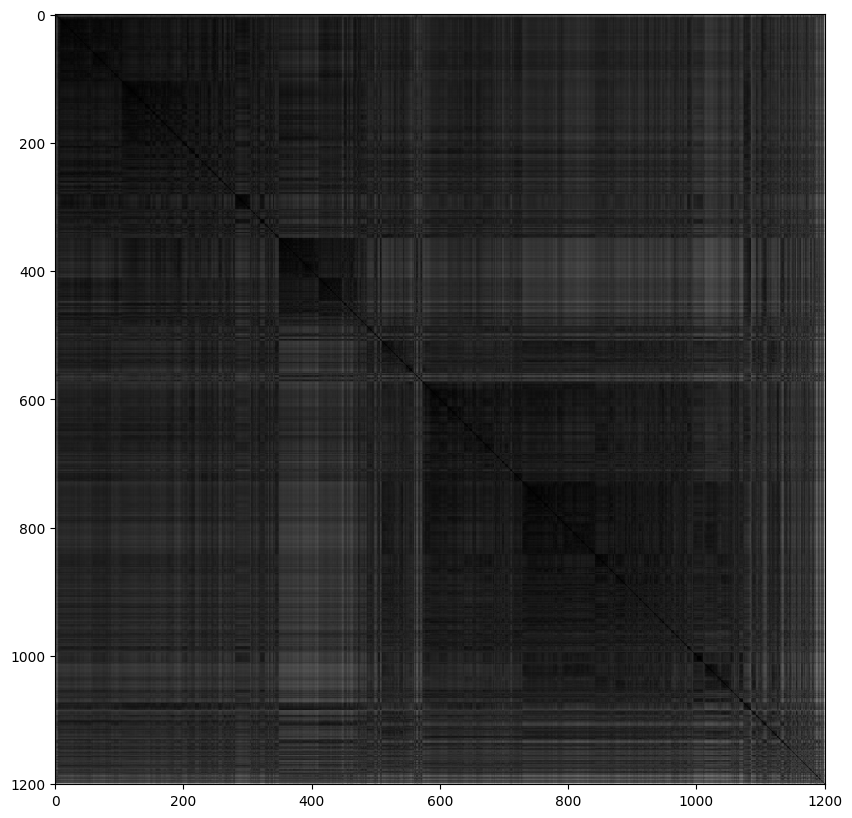

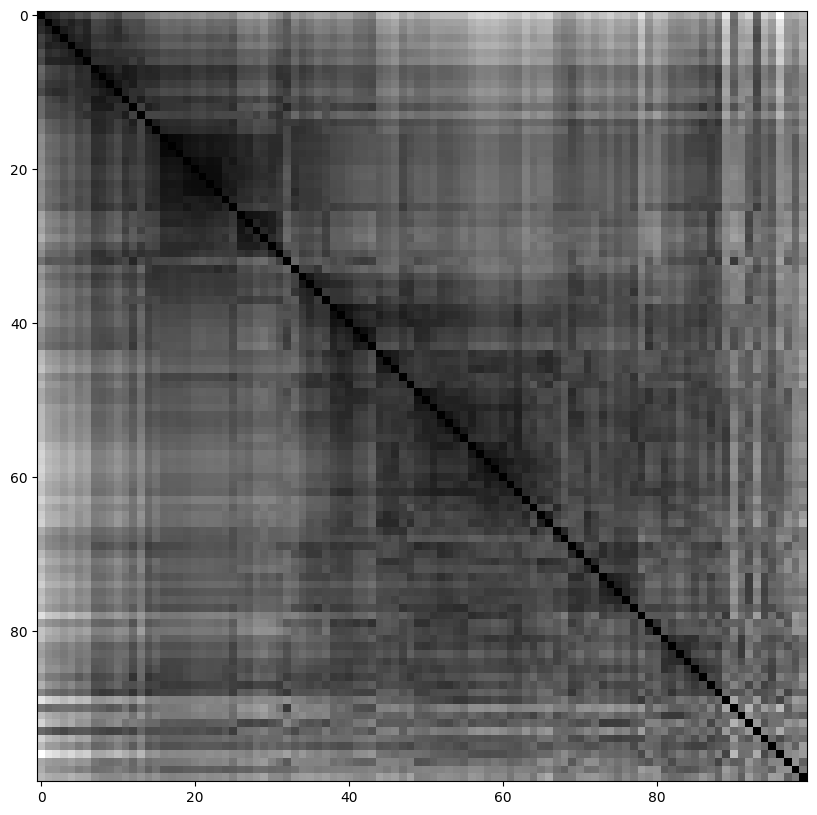

In [500]:
pyclustertend.vat(X_scale)
pyclustertend.vat(X_sample)

La gráfica VAT muestra una matriz de distancia, en donde los puntos representan la distancia entre los datos. La transición de negro a gris claro lo que nos indica es la intensidad de distancias. Siendo el negro distancias cortas y el gris claro distancias largas. Cuando hay áreas grandes de negro, lo que nos indica es que hay clusters muy cerca entre sí. Y se trabajó con una muestra de datos, ya que al usar todos los datos la visualización es bastante densa, por lo cual se decidió trabajar con una muestra de datos para poder visualizar mejor la gráfica.

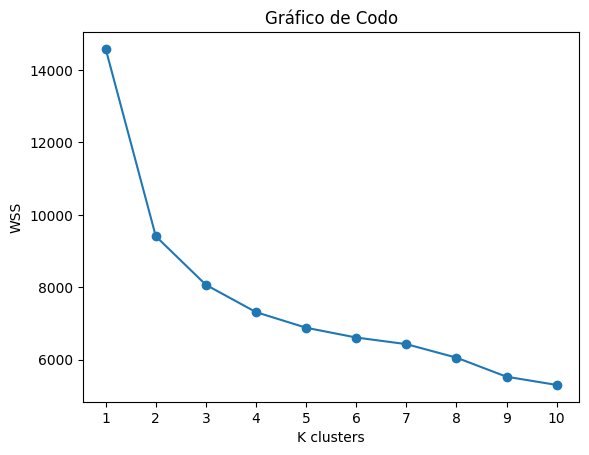

In [501]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#saber el numero de K clusters
numeroClusters = range(1,11)
wcss = []

for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(num_df)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("K clusters")
plt.ylabel("WSS")
plt.title("Gráfico de Codo")
plt.show()

Al analizar el grafico de codo, K=3 es un buen numero para los datos, ya que en la suma de wss disminuye rapidamente hasta 3 clusters y luego ya se vuelve mas gradual.

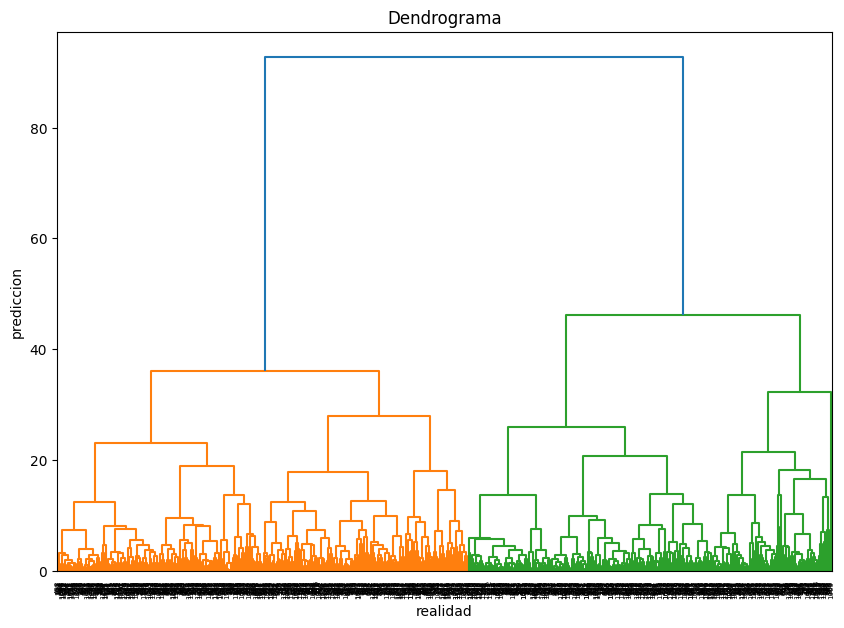

In [502]:
#clustering jerargico
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

# #calcular la matriz de distancias
dist = pdist(X, metric = 'euclidean')
#dendograma
plt.figure(figsize=(10, 7))
linkage = shc.linkage(X, method='ward')
dendro = shc.dendrogram(linkage)
plt.title("Dendrograma")
plt.xlabel("realidad")
plt.ylabel("prediccion")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.31235541987602317
For n_clusters = 3 The average silhouette_score is : 0.2372296619485528
For n_clusters = 4 The average silhouette_score is : 0.203220000213386
For n_clusters = 5 The average silhouette_score is : 0.1963587122490986
For n_clusters = 6 The average silhouette_score is : 0.1937331539384002


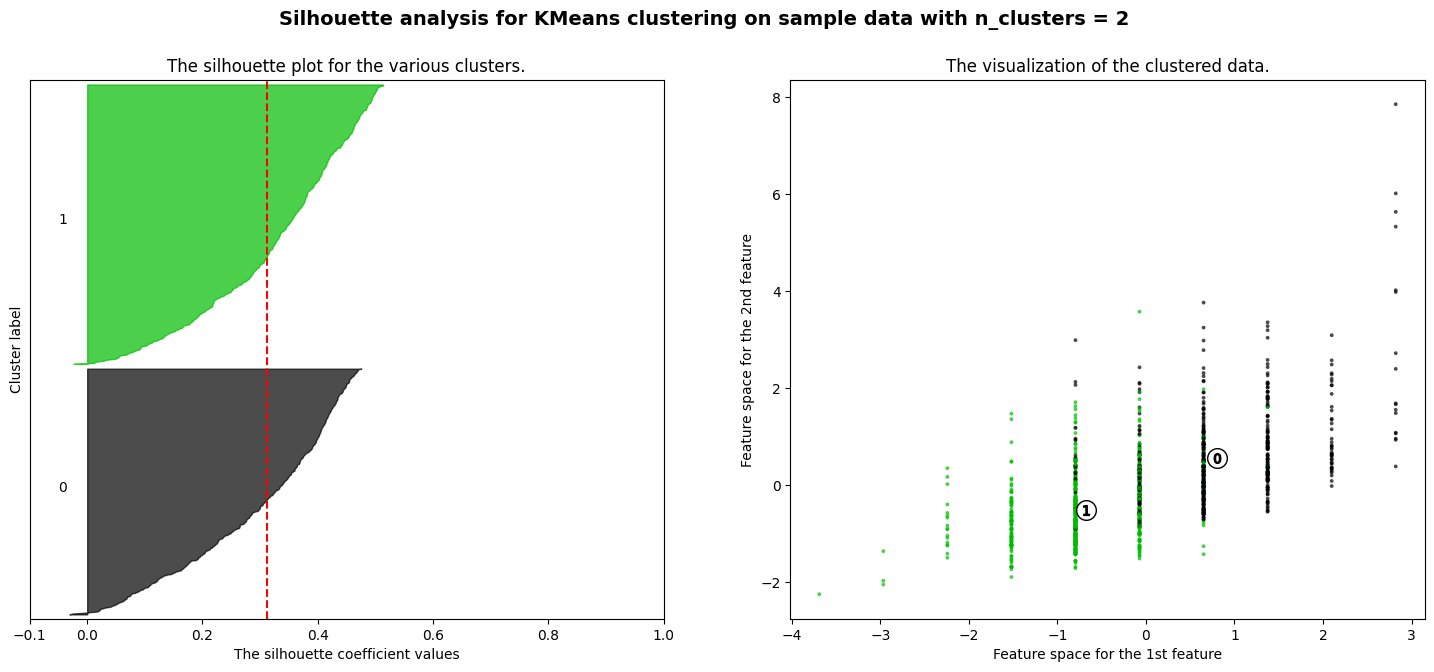

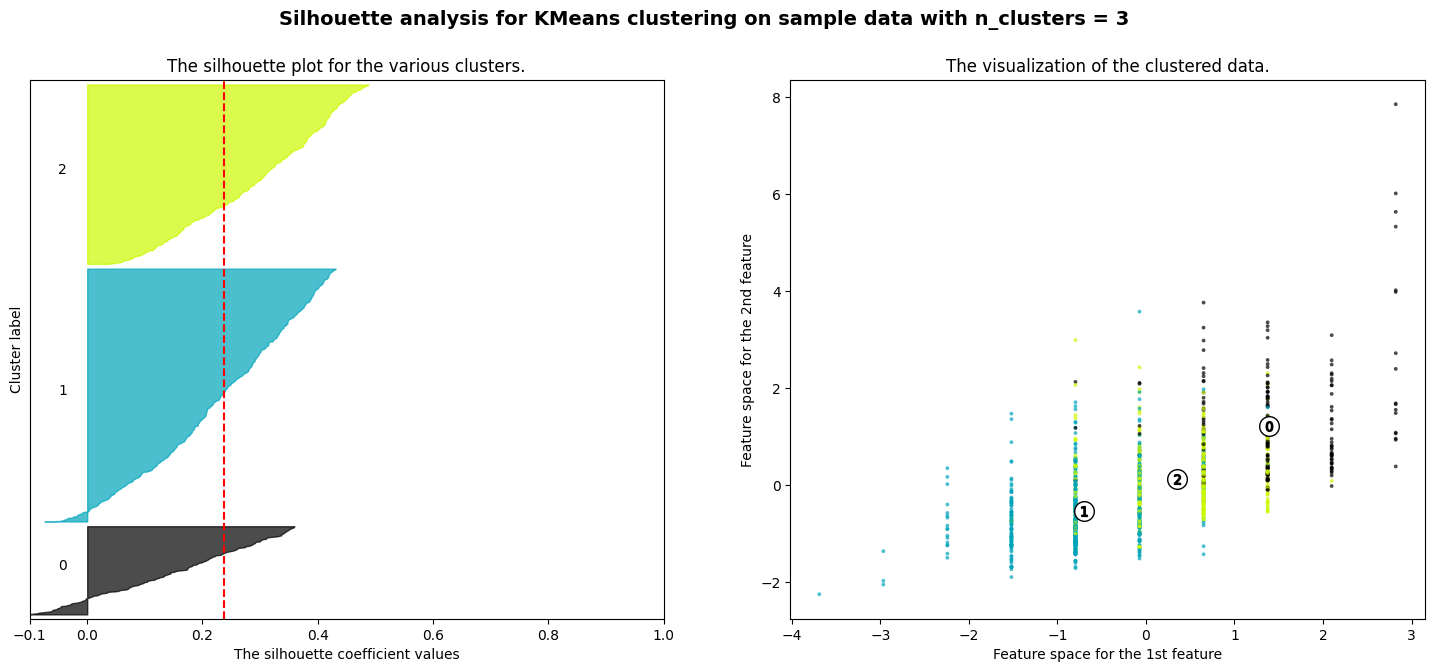

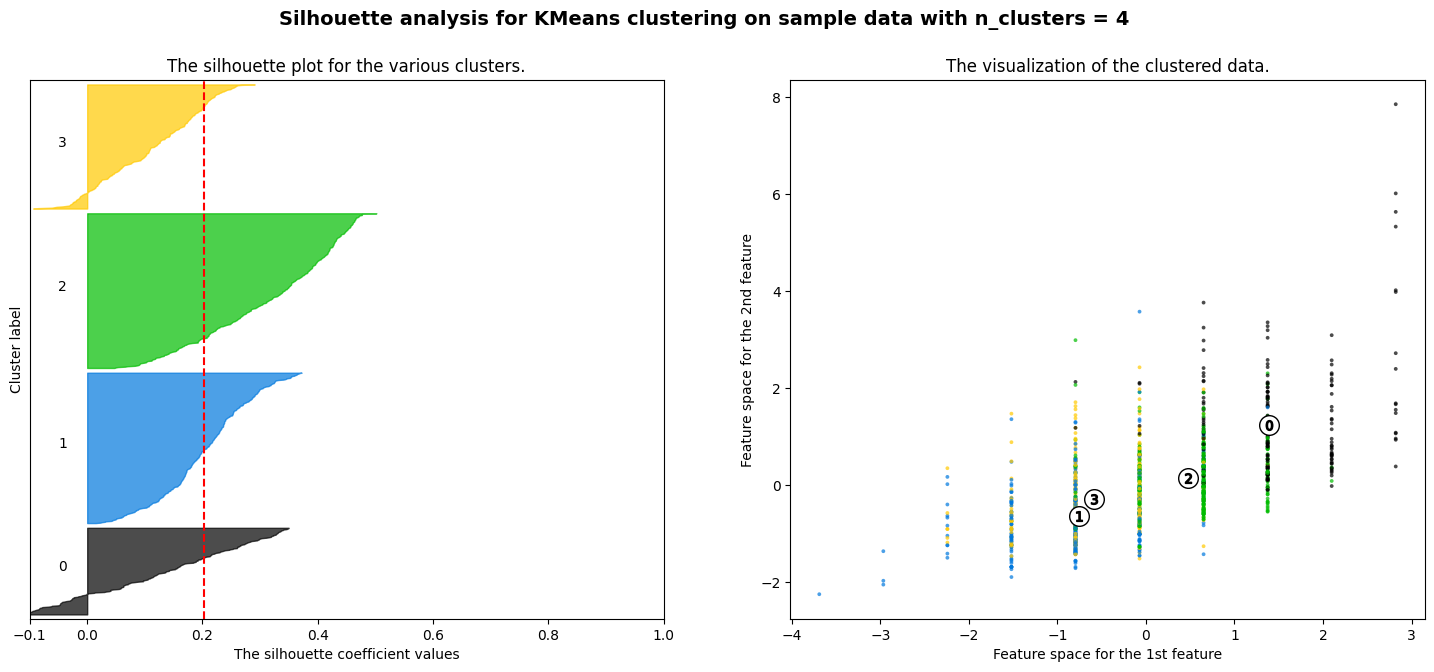

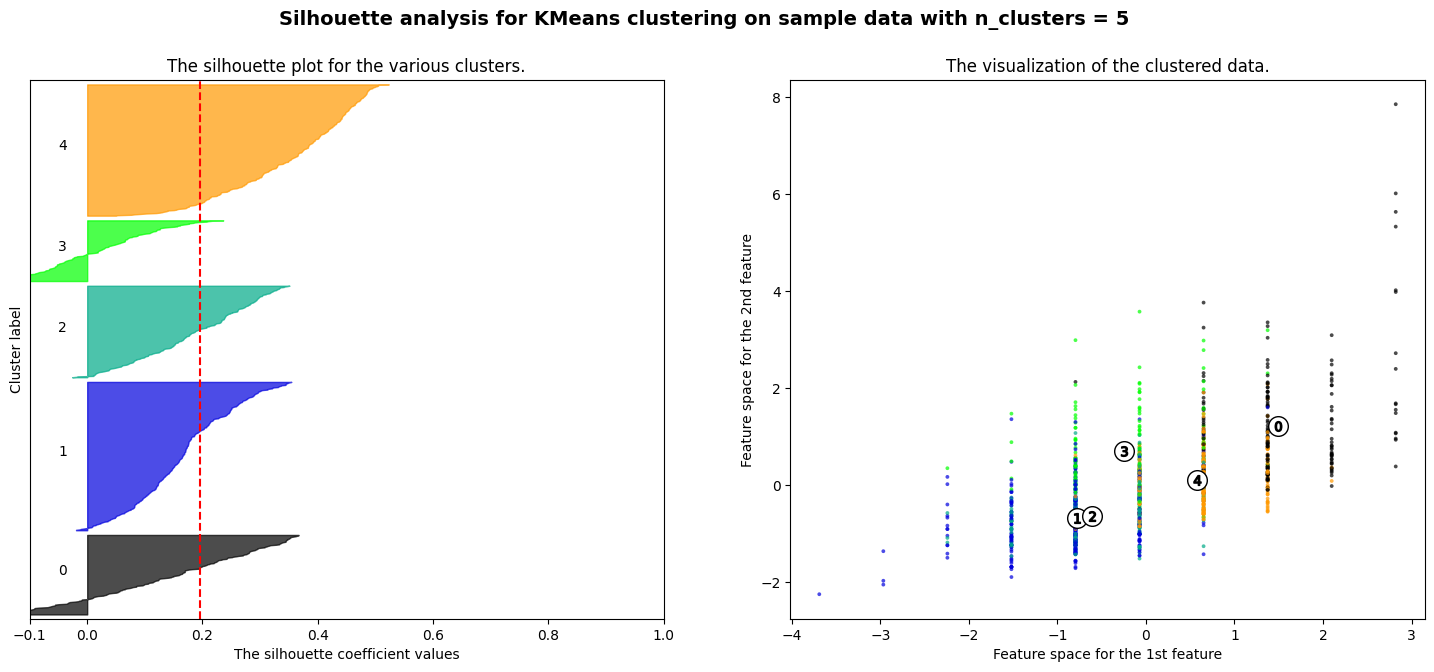

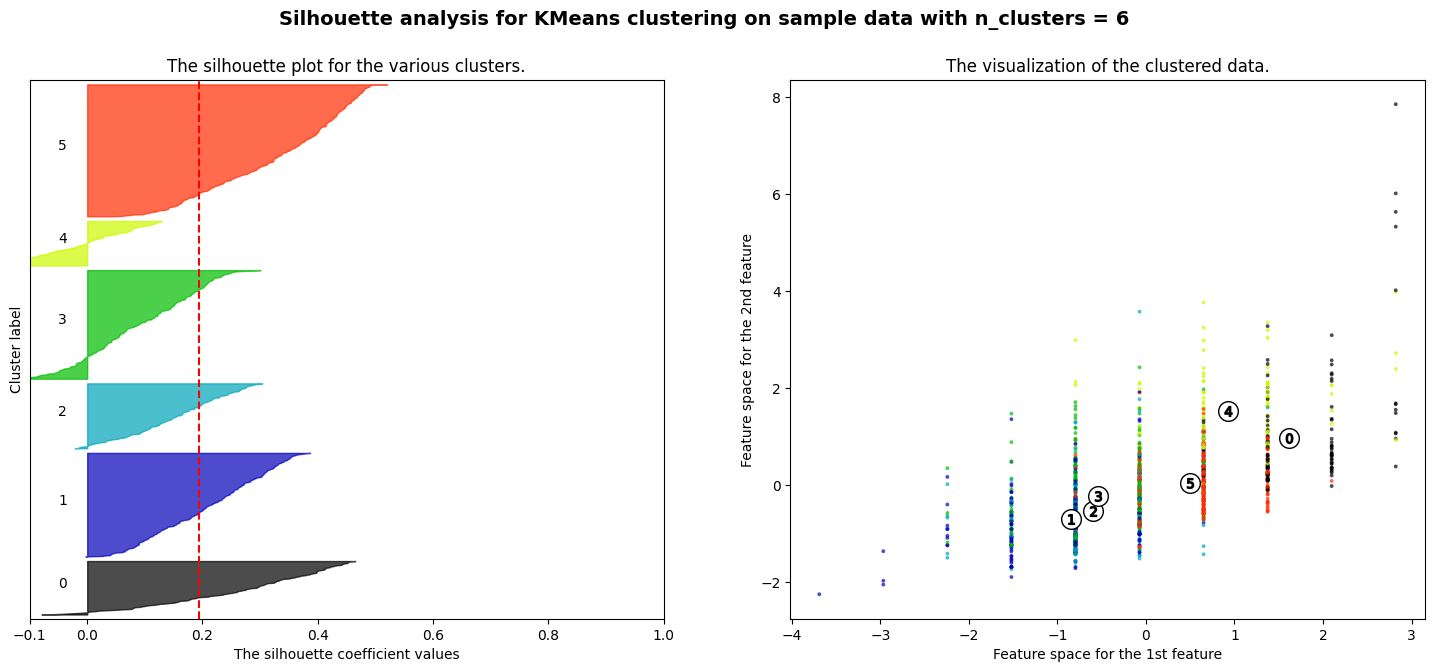

In [503]:
'''
este algoritmo fue tomado del archivo que dice Clustering.ipynb de la carpeta de ejemplos en modulos de la clase
'''


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# convertir x en un np.array
X_array = X.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_array[:, 0], X_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

El grafico de la silueta, lo que mide es que tan similar un punto a otros dentro del mismo cluster. Y este puede variar entre -1 a 1. Siendo un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus propios clusters y lejos de otros clusters.

Para este caso, en el gráfico, se ve que el número 2 de clusters es el que produce un resultado más equilibrado y el que tiene un valor de silueta más alto promedio. Aunque k=3 también tiene valores de silueta promedio altos. Pero el dendorgama suguiere 3 clusters, notando que el número 3 de clusters es buen número siendo el segundo resultado más equilibrado.


las catacteristicas seleccionadas son:  Index(['OverallQual', 'GrLivArea', 'GarageCars'], dtype='object')


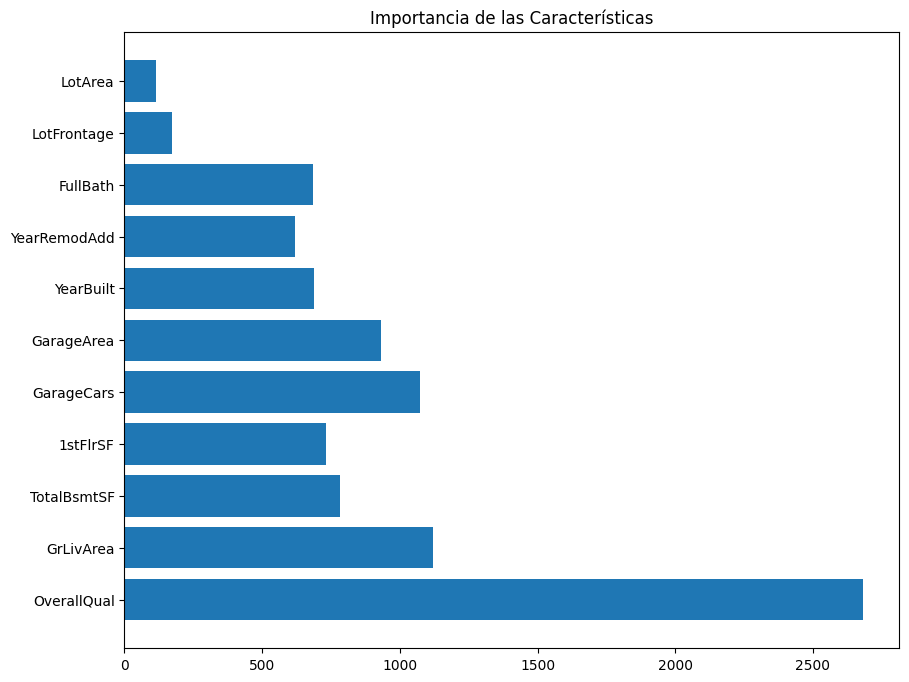

In [504]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, f_regression

selector= SelectKBest(f_regression, k=3) #seleccionar las mejores caracteristicas
selector.fit(X, y) #ajustar el selector de datos

features_Selected = selector.get_support(indices=True)
features_Selected_names = X.columns[features_Selected]
print("las catacteristicas seleccionadas son: ", features_Selected_names)

#grafico de la importancia de la categoria
plt.figure(figsize=(10, 8))
plt.barh(X.columns, selector.scores_)
plt.title("Importancia de las Características")
plt.show()

In [505]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear el modelo de KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

y_transformed = np.log1p(y)
scaler = StandardScaler()
y_transformed_scaled = scaler.fit_transform(y_transformed.values.reshape(-1, 1)).flatten()

#valores nulos
print(np.isnan(y_transformed_scaled).sum())
# Eliminar NaN
# y_transformed_scaled = y_transformed_scaled[~np.isnan(y_transformed_scaled)]
# Imputar NaN (ejemplo: imputar con la media)
y_transformed_scaled[np.isnan(y_transformed_scaled)] = np.nanmean(y_transformed_scaled)
print(np.isnan(y_transformed_scaled).sum())

labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']

# Usar q=6 para crear 6 cuantiles
y_binned_transformed = pd.qcut(y_transformed_scaled, q=6, labels=labels)

# Divisiones
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binned_transformed, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Valor minimo: {X_train.min()}")
print(f"Valor maximo: {X_train.max()}")

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

173
0
Valor minimo: -3.6162245630079712
Valor maximo: 11.460044331657846
Train shape: (960, 11), (960,)
Validation shape: (120, 11), (120,)
Test shape: (121, 11), (121,)


c:\Users\angel\OneDrive\Documentos\.universidad\.2025\mineria\hts\HDT3-MDD\VirtualEnv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [506]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.15
Valor: 0.000006 - Precisión en Validación: 0.15
Valor: 0.000036 - Precisión en Validación: 0.15
Valor: 0.000215 - Precisión en Validación: 0.15
Valor: 0.001292 - Precisión en Validación: 0.36
Valor: 0.007743 - Precisión en Validación: 0.53
Valor: 0.046416 - Precisión en Validación: 0.59
Valor: 0.278256 - Precisión en Validación: 0.59
Valor: 1.668101 - Precisión en Validación: 0.56
Valor: 10.000000 - Precisión en Validación: 0.59
Mejor Valor encontrado: 0.046416


Precisión en Test con C=0.046416: 0.60
Precisión en Test (Accuracy) con C=0.046416: 0.60
Precisión (Precision): 0.59
Recall (Sensibilidad): 0.58

Matriz de Confusión:


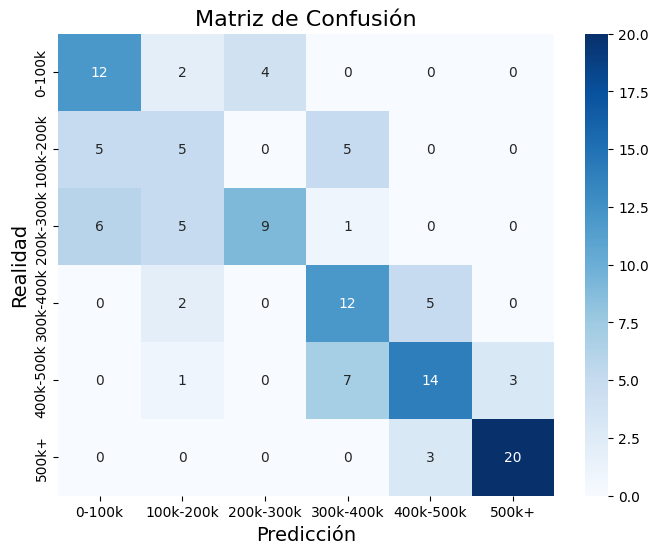

In [507]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Imprimir
print(f"Precisión en Test (Accuracy) con C={best_C:.6f}: {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
# print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()


# #distribución de etiquetas en y_test
# print(y_test.value_counts())

# #distribución de etiquetas en y_pred_test
# print(pd.Series(y_pred_test).value_counts())



Los resultados de este modelo de predicción es que tiene una presicón en el test de 0.60, mientras que la presición es de 0.59 y su sensibilidad de 0.58. Al ver la matriz de confusión, parece ser que el modelo tiene dificultades para diferenciar entre las categorias de precio, más en las clases cercanas.

## Hallazgos
Al notar que en el modelo que no se usa normalizacion tiene un mejor rendimiento que en el que si se usa, puede que no este mejorando el rendimiento del modelo, esto puede ser por el sobreajuste.